In [ ]:
import numpy as np
import sklearn as skt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install xlrd

In [ ]:
from google.colab import drive
import os
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define the folder path
folder_path = '/content/drive/My Drive/BRAC DATA'

# List files in the folder
files = os.listdir(folder_path)
print("Files in folder:", files)

# Read an example Excel file
file_path = os.path.join(folder_path, 'Dabi_Receipts_Expenditure_Year 2005.xls')
df = pd.read_excel(file_path)
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files in folder: ['Dabi_Receipts_Expenditure_Year 2011.xls', 'Dabi_Receipts_Expenditure_Year 2012.xls', 'Dabi_Receipts_Expenditure_Year 2013.xls', 'Dabi_Receipts_Expenditure_Year 2010.xls', 'Dabi_Receipts_Expenditure_Year 2007.xls', 'Dabi_Receipts_Expenditure_Year 2005.xls', 'Dabi_Receipts_Expenditure_Year 2006.xls', 'Dabi_Receipts_Expenditure_Year 2009.xls', 'Dabi_Receipts_Expenditure_Year 2008.xls']
  Region Name Area Name  Branch code Branch Name  Accounts Code  \
0   B.Baria-1   Akhaura        803.0     Akhaura      1501555.0   
1   B.Baria-1   Akhaura        803.0     Akhaura      1501592.0   
2   B.Baria-1   Akhaura        803.0     Akhaura            NaN   
3   B.Baria-1   Akhaura        803.0     Akhaura      1502215.0   
4   B.Baria-1   Akhaura        803.0     Akhaura      1502225.0   

                         Head of Accounts  This month Amount  \

In [ ]:
from google.colab import drive
import os
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define the folder path
folder_path = '/content/drive/My Drive/BRAC DATA'

# List files in the folder
files = os.listdir(folder_path)
print("Files in folder:", files)

# Read an example Excel file
file_path = os.path.join(folder_path, 'Dabi_Receipts_Expenditure_Year 2005.xls')
df = pd.read_excel(file_path, engine='xlrd')
print(df.head())

def merge_excel_files(directory):
    # List to store DataFrames from each file
    dfs = []

    # Loop through each year from 2005 to 2013
    for year in range(2005, 2013):
        filename = f"Dabi_Receipts_Expenditure_Year {year}.xls"
        filepath = os.path.join(directory, filename)

        # Check if the file exists
        if os.path.exists(filepath):
            print(f"Processing file: {filename}")

            try:
                # Read all sheets from the Excel file
                xls = pd.ExcelFile(filepath, engine='xlrd')
                sheet_names = xls.sheet_names

                # Loop through each sheet and read into DataFrame
                for sheet_name in sheet_names:
                    print(f"Reading sheet: {sheet_name}")
                    df = pd.read_excel(filepath, sheet_name=sheet_name, engine='xlrd')

                    # Add a 'Year' column to the DataFrame
                    df['Year'] = year

                    # Append DataFrame to list
                    dfs.append(df)
            except Exception as e:
                print(f"Error reading {filename}: {e}")
        else:
            print(f"File not found: {filename}")

    # Concatenate all DataFrames into a single DataFrame
    if dfs:
        merged_df = pd.concat(dfs, ignore_index=True)
    else:
        print("No dataframes to concatenate.")
        merged_df = pd.DataFrame()

    return merged_df

# Directory containing Excel files
directory_path = folder_path

# Merge Excel files from the directory
merged_data = merge_excel_files(directory_path)

# Display the merged data
if not merged_data.empty:
    print(merged_data.head())
else:
    print("No data to display.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files in folder: ['Dabi_Receipts_Expenditure_Year 2011.xls', 'Dabi_Receipts_Expenditure_Year 2012.xls', 'Dabi_Receipts_Expenditure_Year 2013.xls', 'Dabi_Receipts_Expenditure_Year 2010.xls', 'Dabi_Receipts_Expenditure_Year 2007.xls', 'Dabi_Receipts_Expenditure_Year 2005.xls', 'Dabi_Receipts_Expenditure_Year 2006.xls', 'Dabi_Receipts_Expenditure_Year 2009.xls', 'Dabi_Receipts_Expenditure_Year 2008.xls']
  Region Name Area Name  Branch code Branch Name  Accounts Code  \
0   B.Baria-1   Akhaura        803.0     Akhaura      1501555.0   
1   B.Baria-1   Akhaura        803.0     Akhaura      1501592.0   
2   B.Baria-1   Akhaura        803.0     Akhaura            NaN   
3   B.Baria-1   Akhaura        803.0     Akhaura      1502215.0   
4   B.Baria-1   Akhaura        803.0     Akhaura      1502225.0   

                         Head of Accounts  This month Amount  \

In [ ]:
merged_data

Region Name  Area Name  Branch code       Branch Name  Accounts Code  \
0         B.Baria-1    Akhaura        803.0           Akhaura      1501555.0   
1         B.Baria-1    Akhaura        803.0           Akhaura      1501592.0   
2         B.Baria-1    Akhaura        803.0           Akhaura            NaN   
3         B.Baria-1    Akhaura        803.0           Akhaura      1502215.0   
4         B.Baria-1    Akhaura        803.0           Akhaura      1502225.0   
...             ...        ...          ...               ...            ...   
6291355    Hobigonj  Madhabpur       7162.0  Madhabpur Bazar/      1509551.0   
6291356    Hobigonj  Madhabpur       7162.0  Madhabpur Bazar/      1509553.0   
6291357    Hobigonj  Madhabpur       7162.0  Madhabpur Bazar/            NaN   
6291358    Hobigonj  Madhabpur       7162.0  Madhabpur Bazar/      1509429.0   
6291359    Hobigonj  Madhabpur       7162.0  Madhabpur Bazar/      1509552.0   

                               Head of Accounts  This month Amount  \
0                 1.1   Interest Income on Loan            -182302   
1             1.3   Gain due to early repayment             -30316   
2                                 Total Income:            -212618   
3        2.1   Int. Prov. on Gr. Savings & Dep.              29394   
4                   2.2   Interest on BRAC loan              51663   
...                                         ...                ...   
6291355            A.2   Principal Disbursement            2102000   
6291356                A.3   Principal Realised           -1832789   
6291357             Total Principal Outstanding            1153266   
6291358      A.5   Opening Interest Outstanding              15931   
6291359               A.6   Interest Receivable             295945   

         Cumulative Amount Product type  Year  Month       Date  
0                  -182302     consumer  2005      1 2005-01-31  
1                   -30316     consumer  2005      1 2005-01-31  
2                  -212618     consumer  2005      1 2005-01-31  
3                    29394     consumer  2005      1 2005-01-31  
4                    51663     consumer  2005      1 2005-01-31  
...                    ...          ...   ...    ...        ...  
6291355           22476250     consumer  2012     12 2012-12-31  
6291356          -21735118     consumer  2012     12 2012-12-31  
6291357           14660762     consumer  2012     12 2012-12-31  
6291358             147599     consumer  2012     12 2012-12-31  
6291359            3382816     consumer  2012     12 2012-12-31  

[6291360 rows x 12 columns]

In [ ]:
# Assuming your DataFrame is named 'data'
# Replace 'data' with the actual name of your DataFrame

# Filter the DataFrame for rows where 'Head of Accounts' starts with 'Total' and 'Accounts Code' is NaN
total_accounts_null_code = merged_data[(merged_data['Head of Accounts'].str.startswith('Total')) & merged_data['Accounts Code'].isna()]

# Extract unique values of 'Head of Accounts'
unique_total_accounts_null_code = total_accounts_null_code['Head of Accounts'].unique()

print(unique_total_accounts_null_code)

['Total Income:' 'Total Interest Expenses'
 'Total Branch Office Operating Expenses'
 'Total Head Office Operating Expenses' 'Total Other Expenses'
 'Total Capital Investment (Branch Office)' 'Total Principal Outstanding'
 'Total Interest Outstanding' 'Total Closing Loan Outstanding'
 'Total Closing Loan Due' 'Total Revolving Loan Fund'
 'Total Saving Deposit' 'Total Current Essets' 'Total Current Liabilities'
 'Total Other Liabilities' 'Total Savings Loan'
 'Total Regional Office Operating Expenses'
 'Total Capital Investment (Regional Ofice)'
 'Total Capital Investment (Head Office)'
 'Total Operation Expenses of Special Savings'
 'Total Operation Expenses of Branch Review Team'
 'Total Area Office Operating Expenses']


In [ ]:
import pandas as pd

# Filter merged_data based on unique_total_accounts_null_code
filtered_data = merged_data[merged_data['Head of Accounts'].isin(unique_total_accounts_null_code)]

# Group by Year, Month, and Head of Accounts, then sum the amounts
summed_data = filtered_data.groupby(['Year', 'Month', 'Head of Accounts'])['This month Amount'].sum().reset_index()

In [ ]:
summed_data

Year  Month                           Head of Accounts  \
0     2005      1     Total Branch Office Operating Expenses   
1     2005      1   Total Capital Investment (Branch Office)   
2     2005      1  Total Capital Investment (Regional Ofice)   
3     2005      1                     Total Closing Loan Due   
4     2005      1             Total Closing Loan Outstanding   
...    ...    ...                                        ...   
1752  2012     12                    Total Other Liabilities   
1753  2012     12                Total Principal Outstanding   
1754  2012     12   Total Regional Office Operating Expenses   
1755  2012     12                  Total Revolving Loan Fund   
1756  2012     12                       Total Saving Deposit   

      This month Amount  
0              97659494  
1                430573  
2               -102988  
3             207946360  
4             204511833  
...                 ...  
1752           75532797  
1753          347122487  
1754            7074411  
1755          348334711  
1756         -366852127  

[1757 rows x 4 columns]

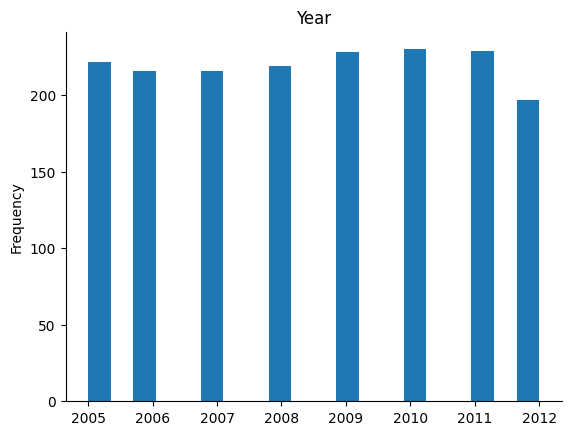

In [ ]:
# @title Year

from matplotlib import pyplot as plt
summed_data['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

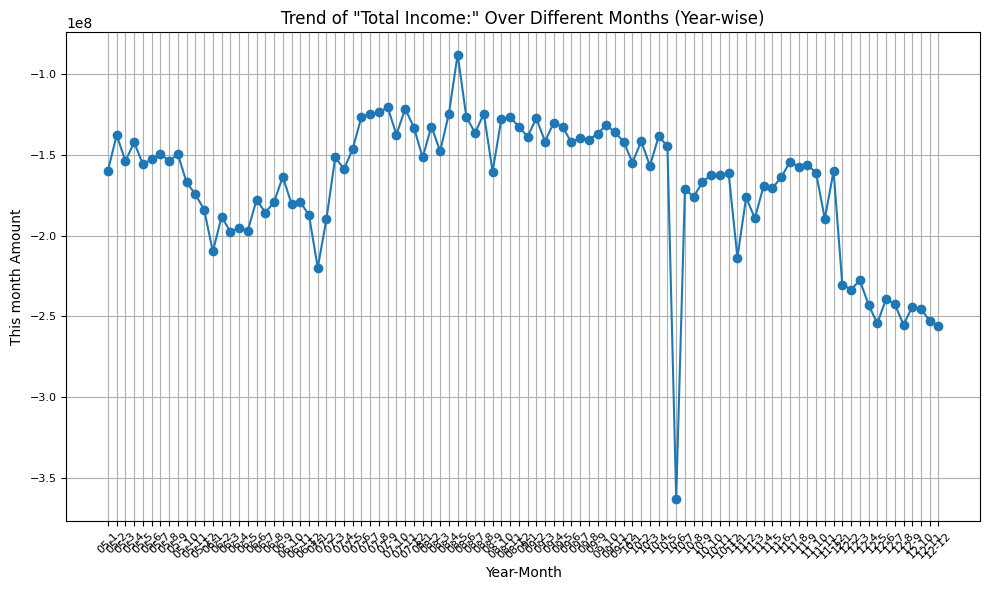

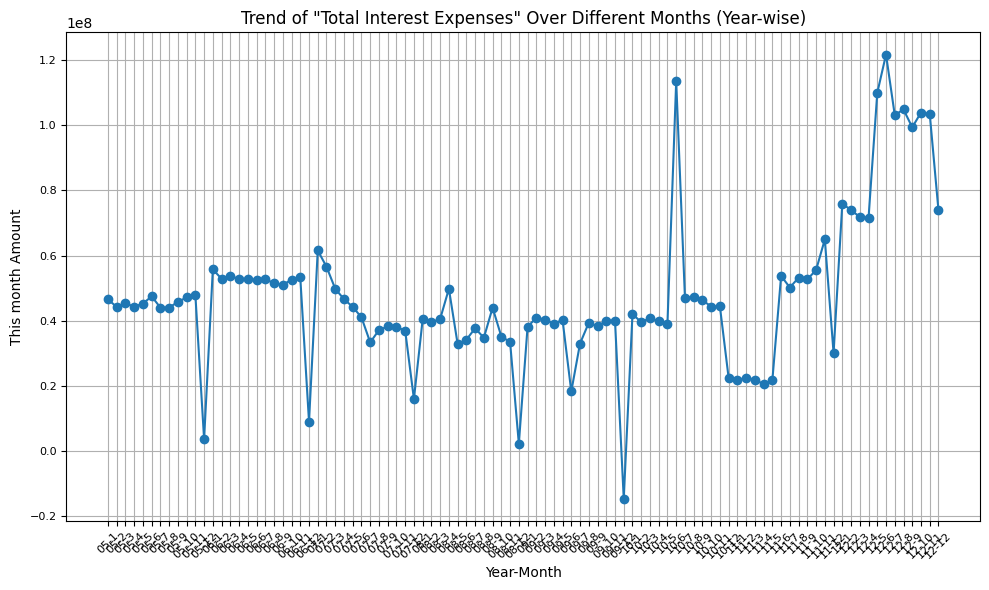

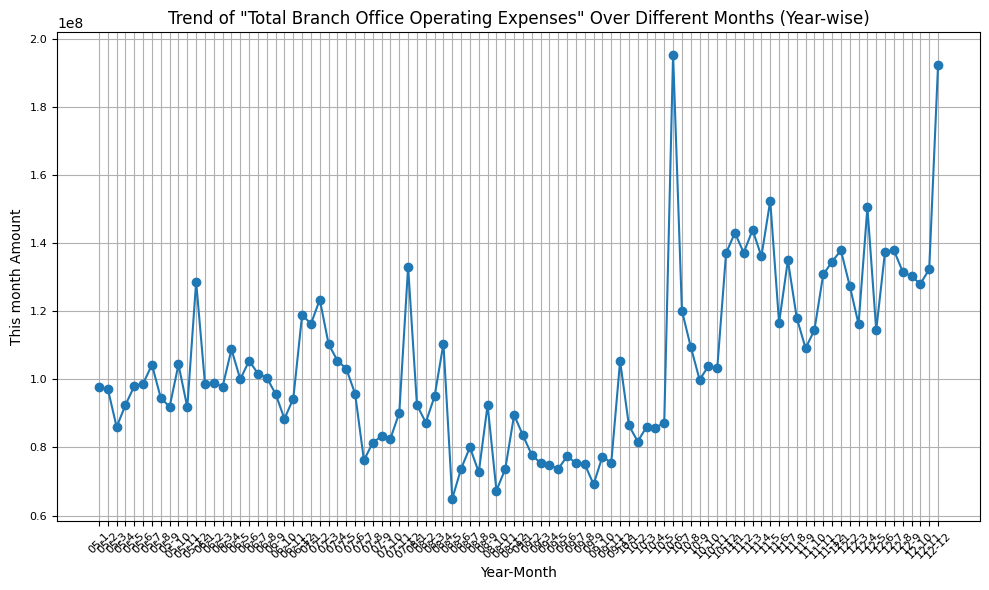

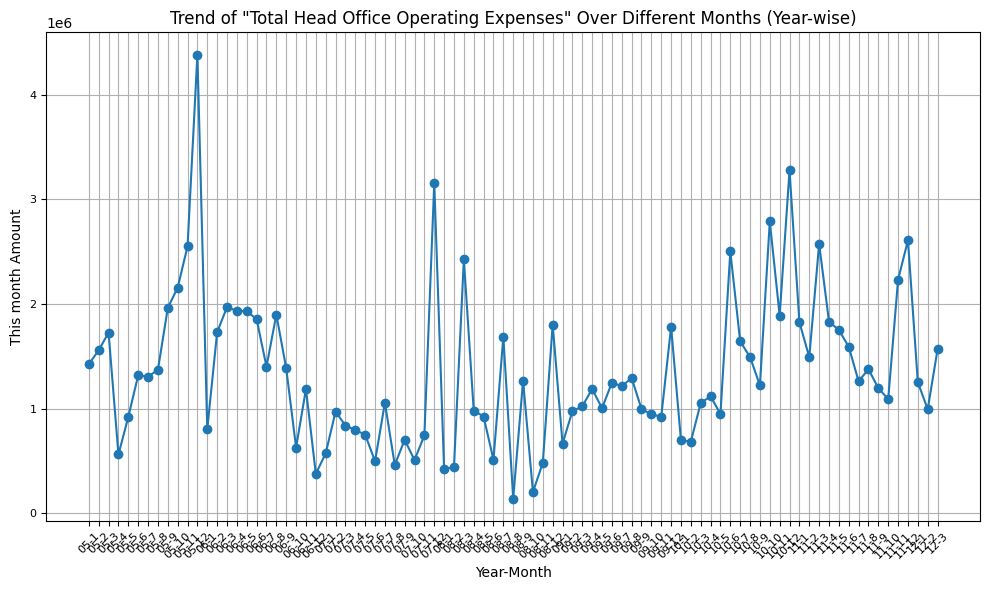

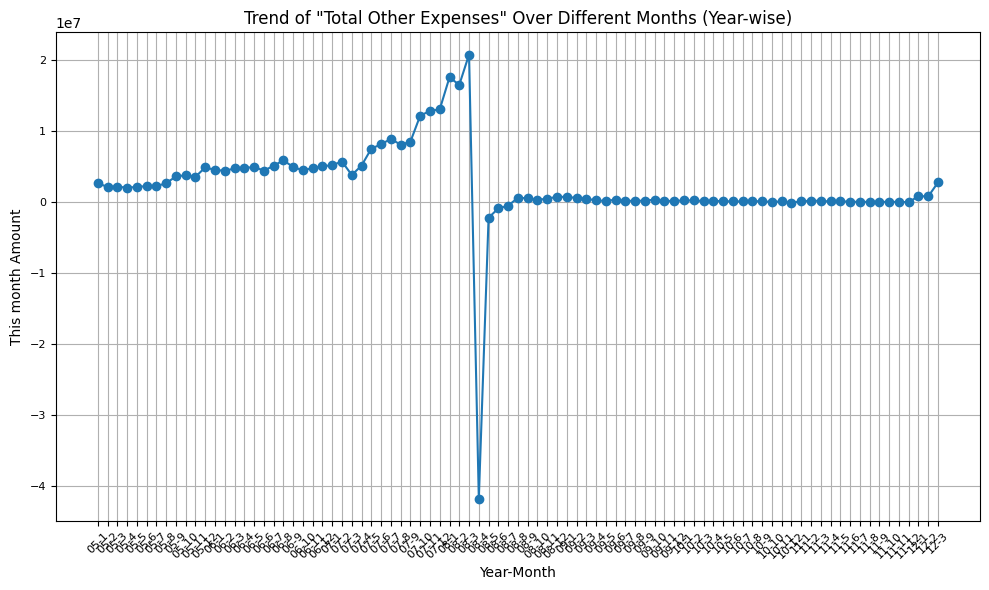

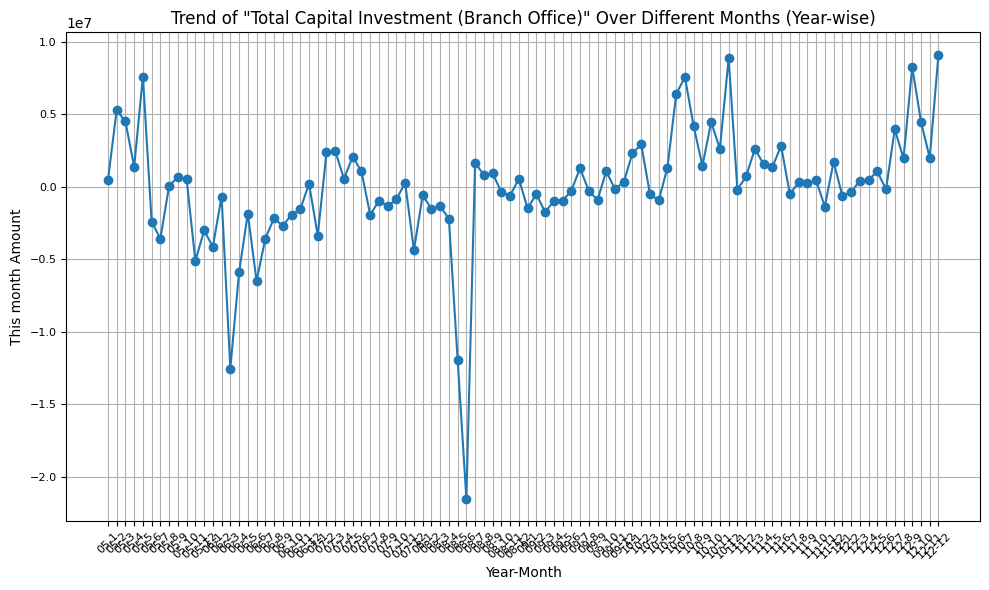

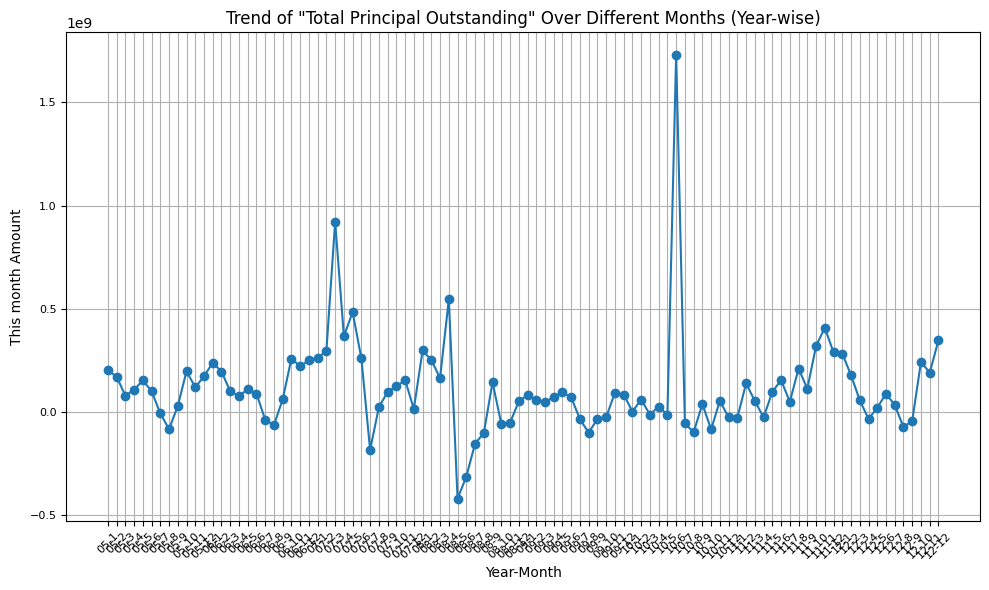

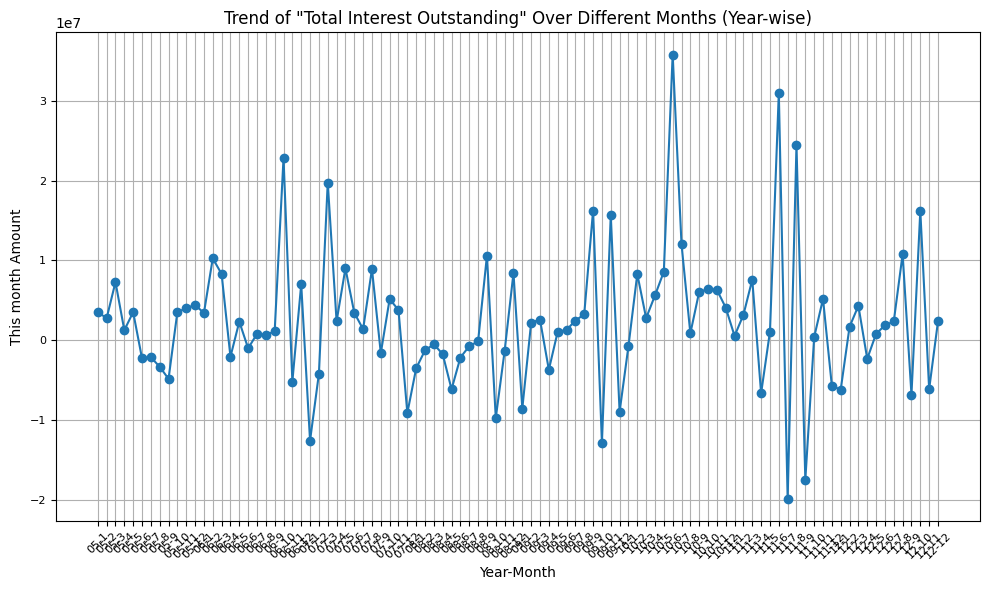

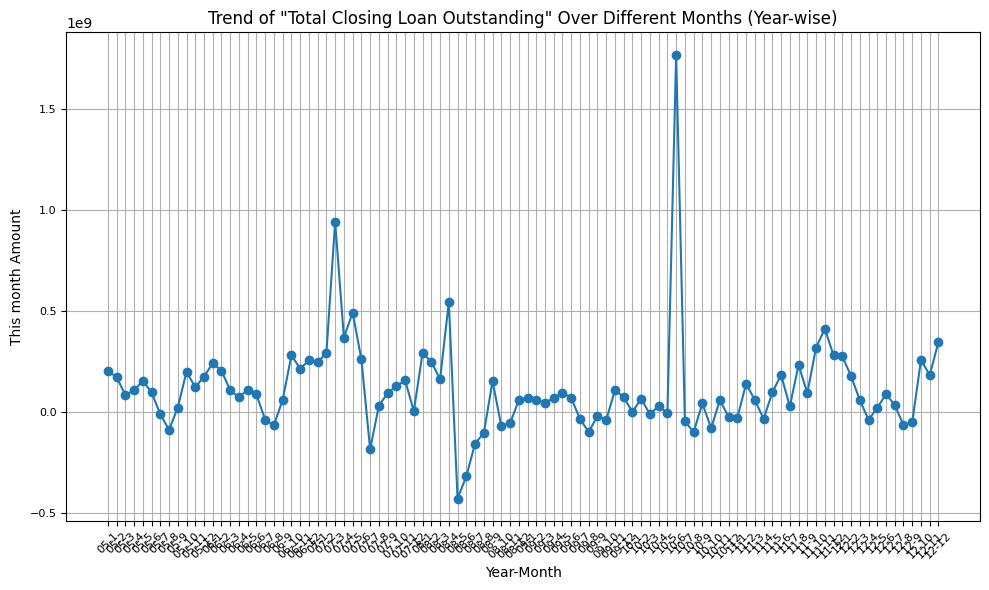

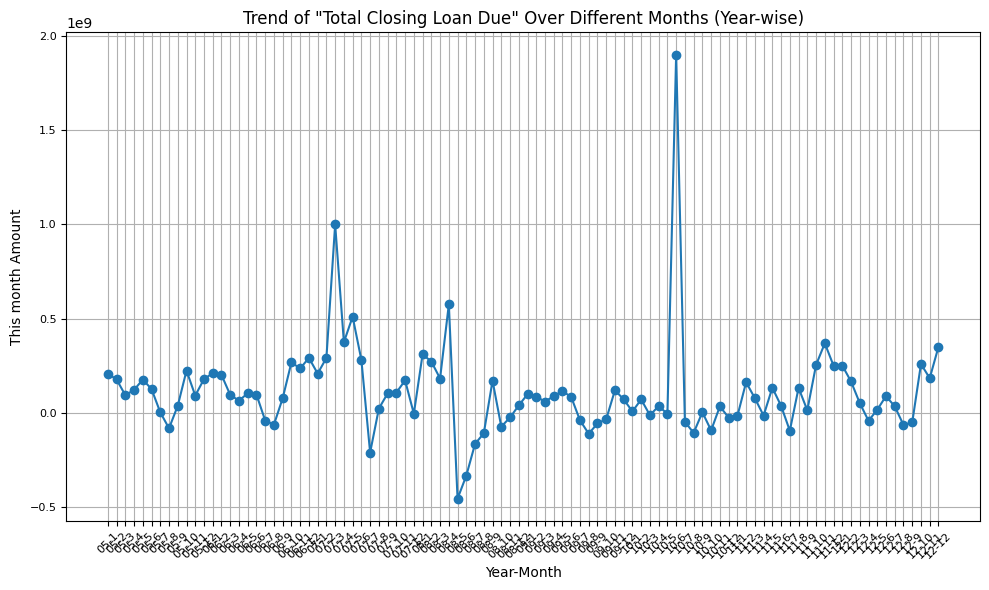

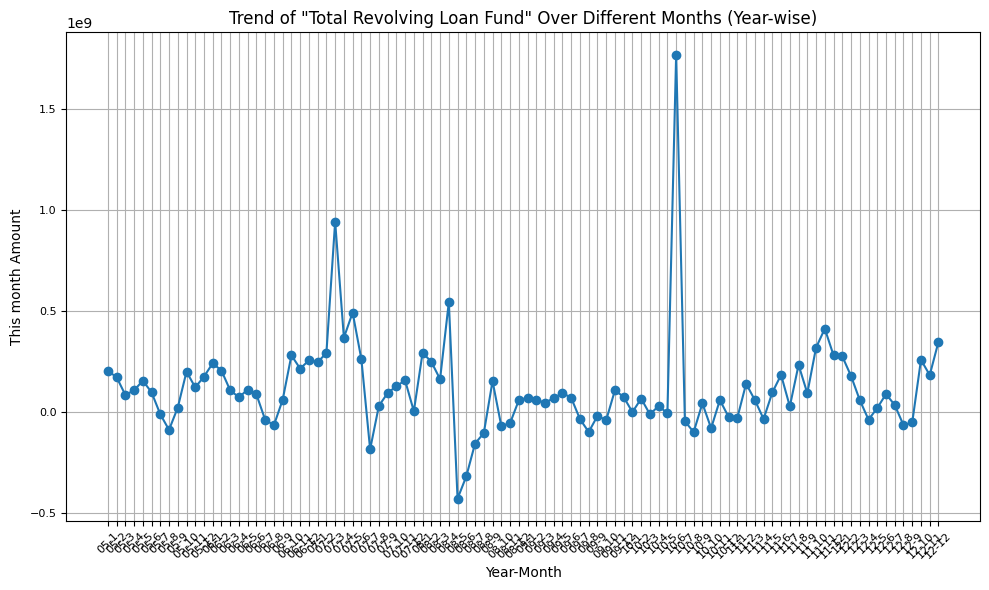

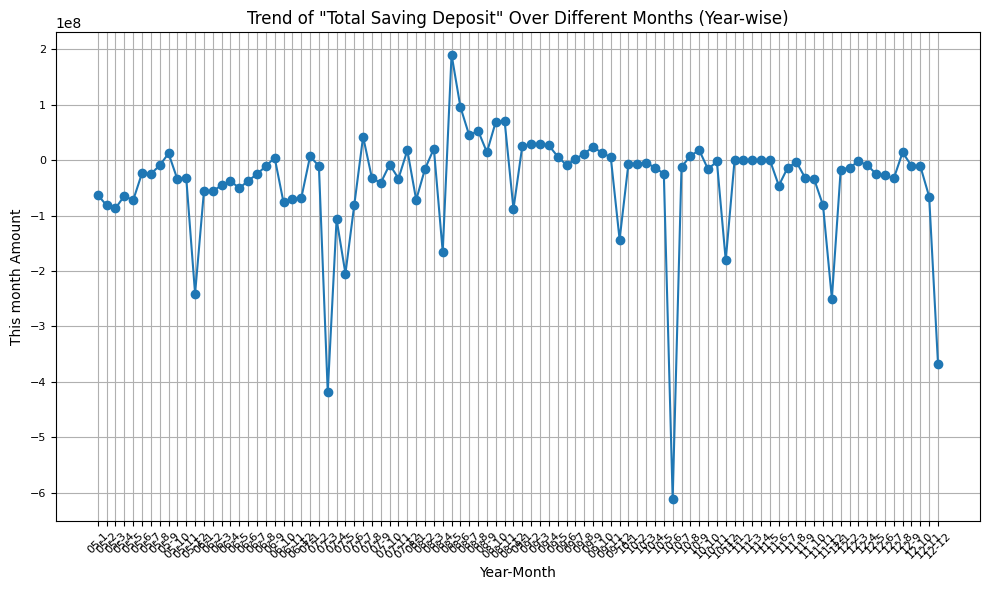

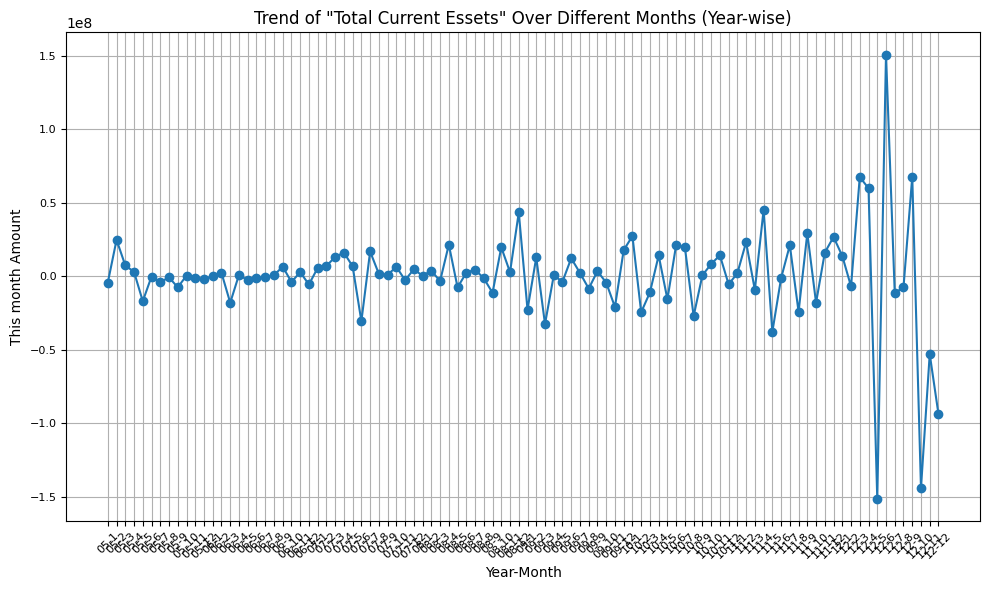

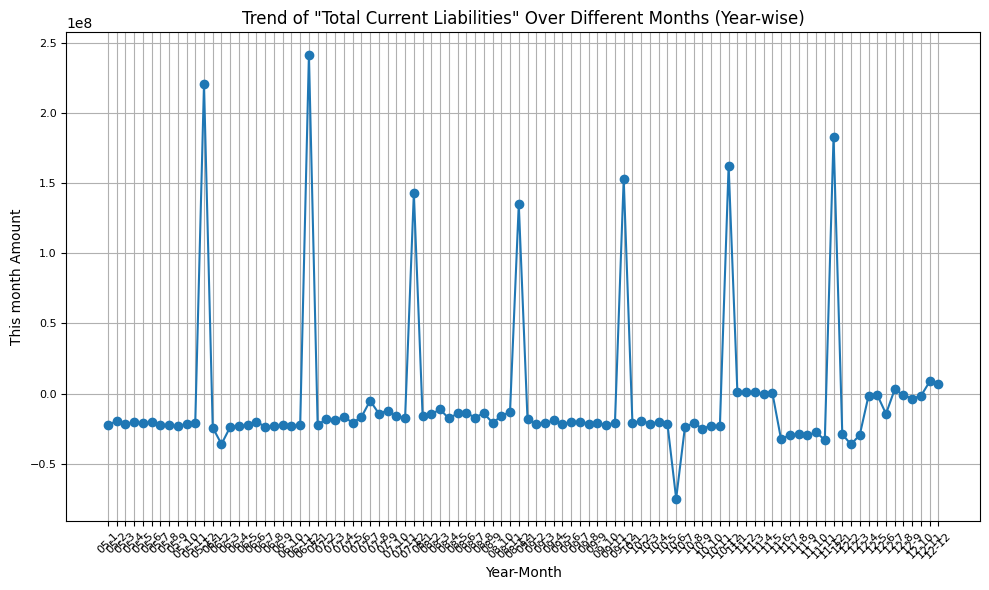

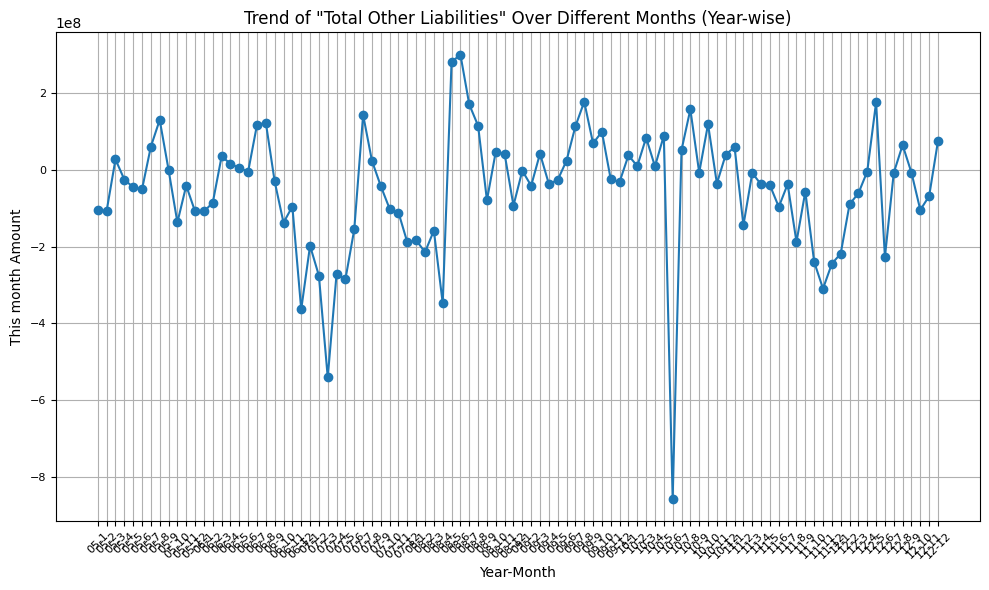

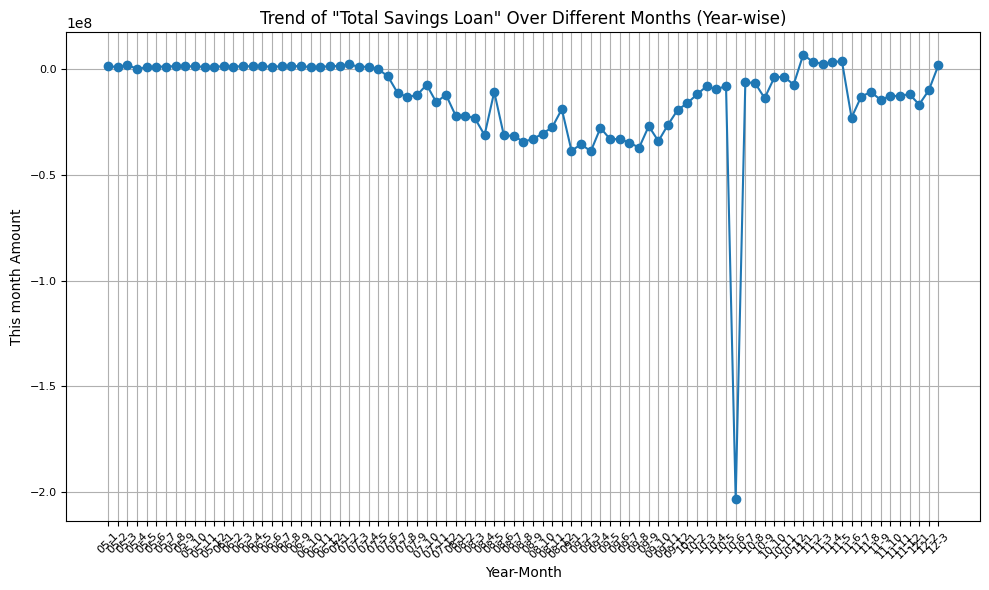

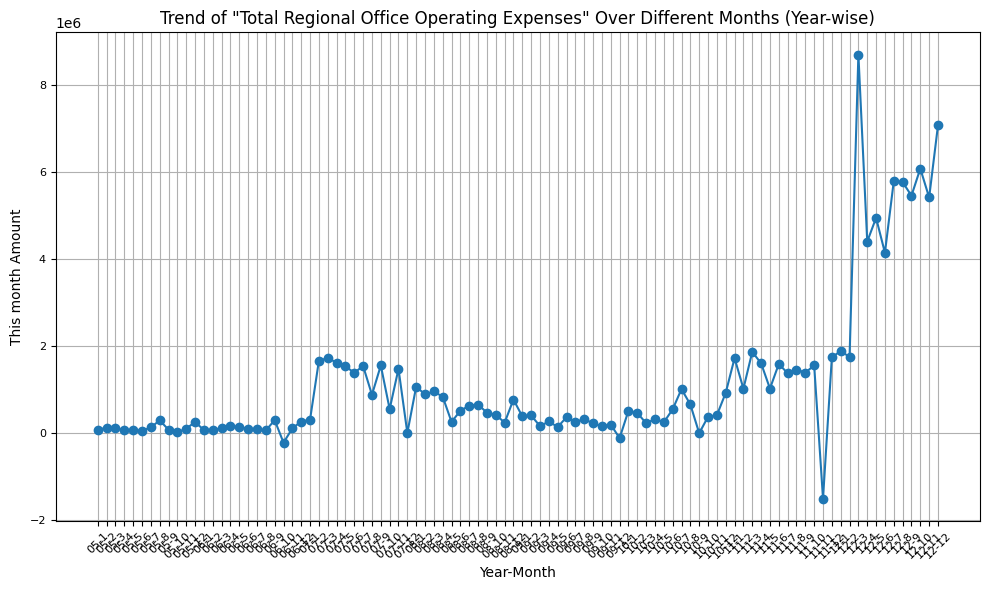

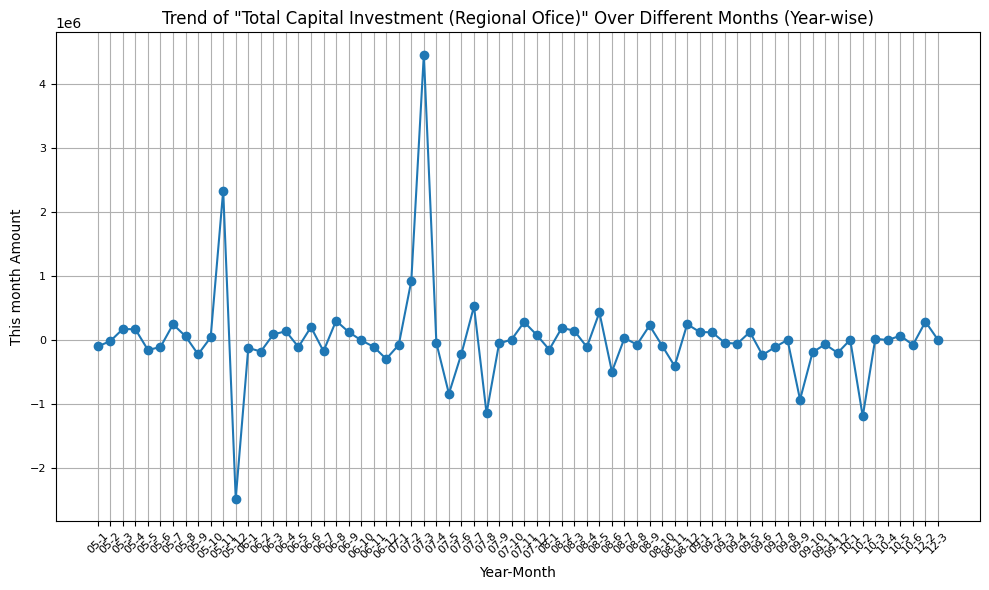

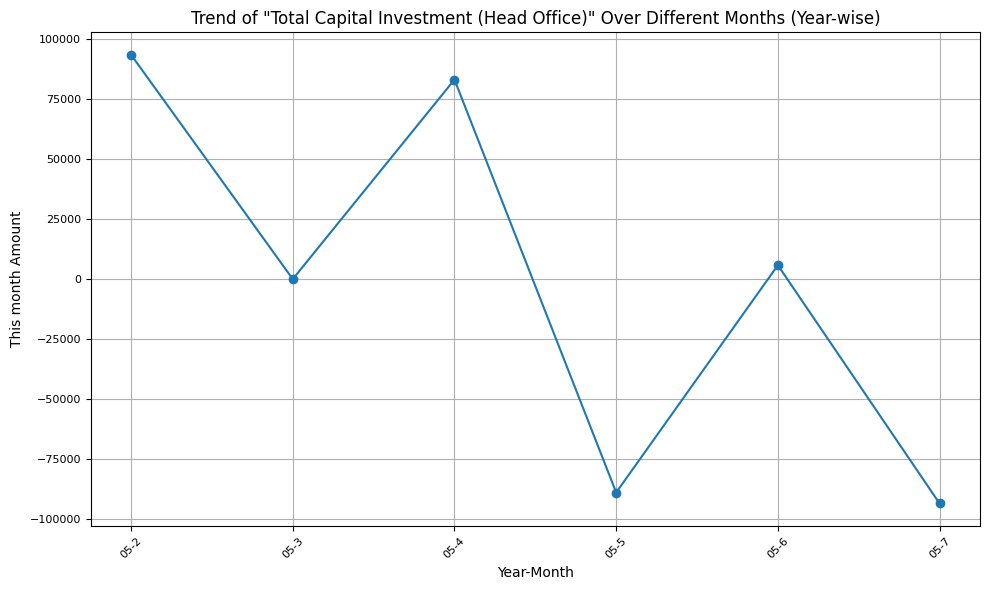

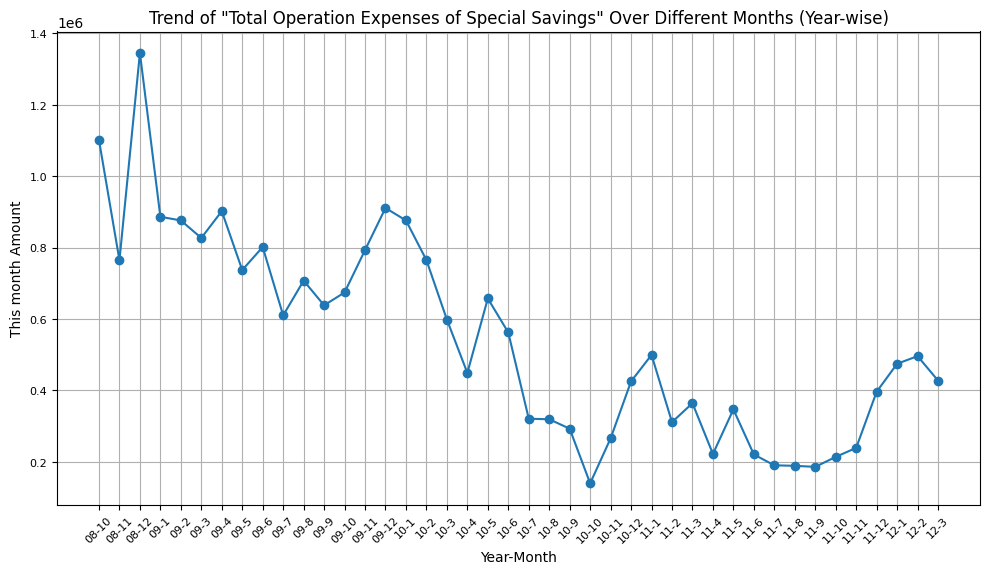

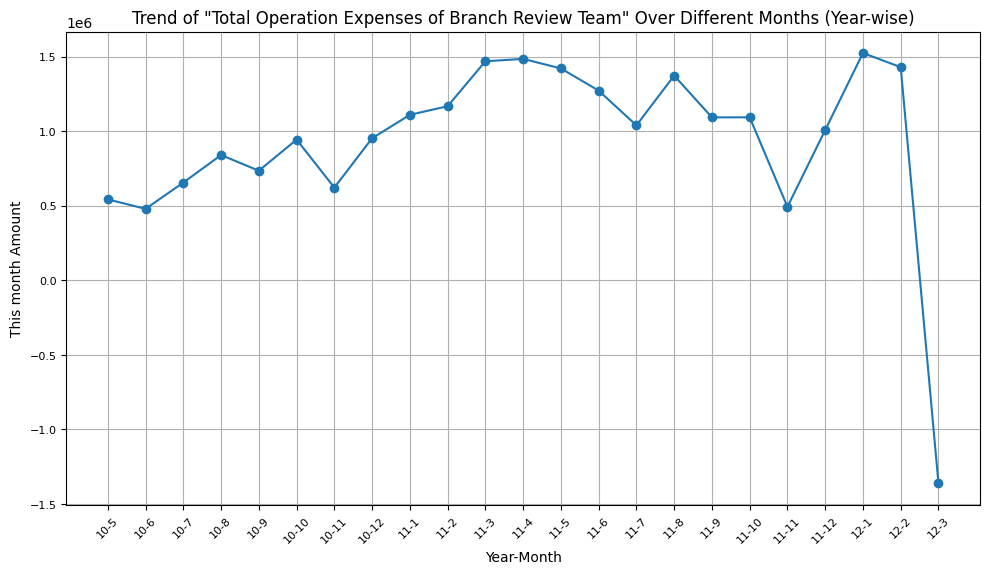

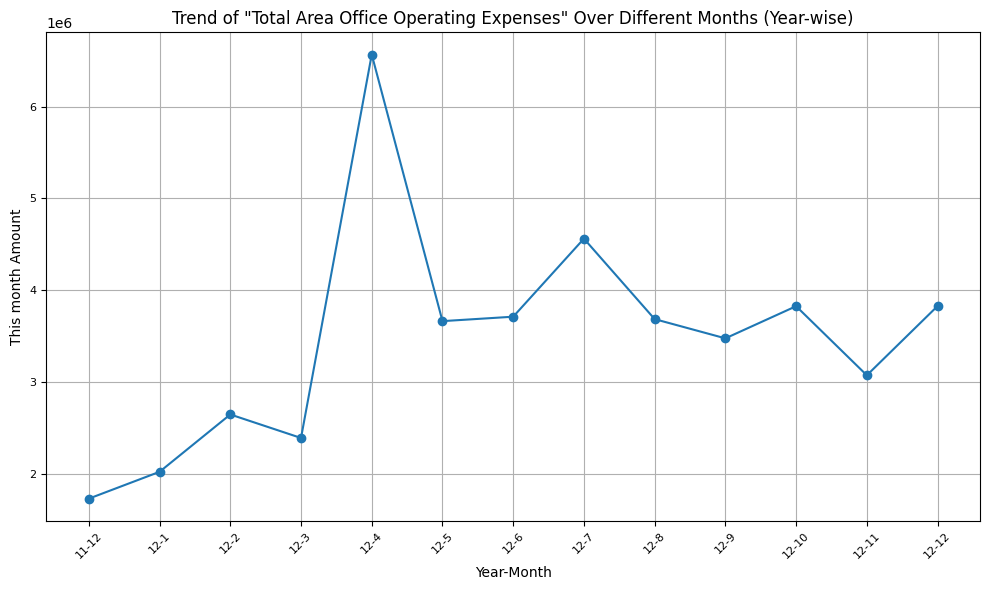

In [ ]:
for head in unique_total_accounts_null_code:
    # Filter data for the current head
    head_data = summed_data[summed_data['Head of Accounts'] == head]

    # Create a new plot for the current head
    plt.figure(figsize=(10, 6))
    plt.plot(head_data['Year'].astype(str).str[-2:] + '-' + head_data['Month'].astype(str), head_data['This month Amount'], marker='o')
    plt.title(f'Trend of "{head}" Over Different Months (Year-wise)')
    plt.xlabel('Year-Month')
    plt.ylabel('This month Amount')
    plt.grid(True)
    plt.xticks(rotation=45, fontsize=8)  # Rotate x-axis labels and decrease font size
    plt.yticks(fontsize=8)  # Decrease font size of y-axis labels
    plt.tight_layout()  # Adjust layout to prevent overlap of labels
    plt.show()

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359260 entries, 0 to 2359259
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Region Name        object        
 1   Area Name          object        
 2   Branch code        float64       
 3   Branch Name        object        
 4   Accounts Code      float64       
 5   Head of Accounts   object        
 6   This month Amount  int64         
 7   Cumulative Amount  int64         
 8   Product type       object        
 9   Year               int64         
 10  Month              int64         
 11  Date               datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 216.0+ MB


In [ ]:
numerical_cols = ['This month Amount', 'Cumulative Amount']
df=merged_data[merged_data['Head of Accounts'] == 'Total Income:']
df[numerical_cols].describe()

This month Amount  Cumulative Amount
count       3.972100e+04       3.972100e+04
mean       -2.424304e+05      -1.455107e+06
std         3.380223e+05       2.336437e+06
min        -6.493206e+06      -4.505433e+07
25%        -2.842410e+05      -1.678518e+06
50%        -1.426200e+05      -7.231890e+05
75%        -7.329500e+04      -2.709800e+05
max         1.798787e+06       6.352360e+05

**Based on these insights, we can conclude that the dataset contains a wide range of financial transactions, with many banks experiencing losses and significant variability in financial performance. Further analysis, including the investigation of outliers and comparison across different time periods or banks, may provide additional insights into the factors influencing the financial performance of these banks.**

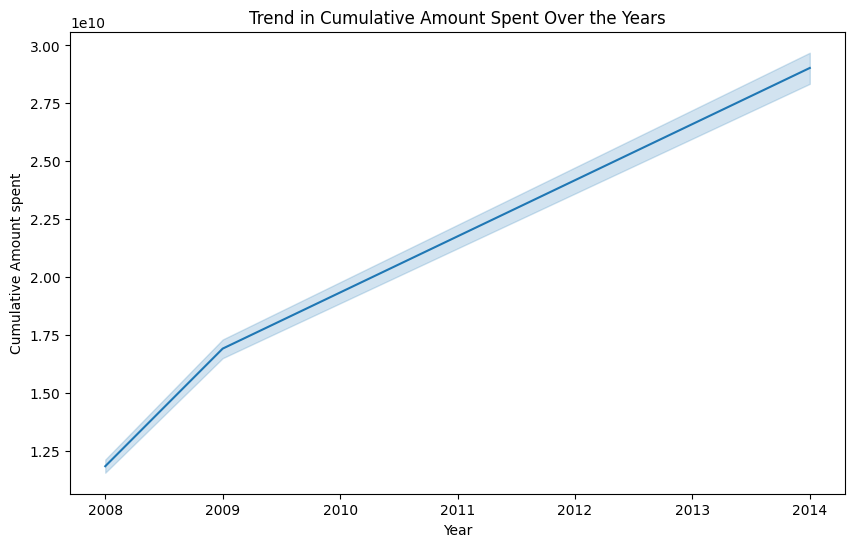

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Cumulative Amount']=-df['Cumulative Amount'] ;
# Plotting trends in cumulative amount over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Cumulative Amount', estimator='sum')
plt.title('Trend in Cumulative Amount Spent Over the Years')
plt.xlabel('Year')
plt.ylabel('Cumulative Amount spent')
plt.show()

In [ ]:

# Split merged DataFrame into individual DataFrames for each year
data_by_year = {}
for year in range(2005, 2013):
    data_by_year[year] = merged_data[merged_data['Year'] == year]

# Lists to store sums for each year
loans_outstanding_sum = []
total_income_sum = []
bo_operating_expenses_sum = []
capital_investment_sum = []
savings_deposit_sum = []
assets_sum = []
liabilities_sum = []

# Calculate sums for each year
for year in range(2005, 2013):
    df = data_by_year[year]
    # Check if the column exists before accessing it
    if 'Loans Outstanding' in df.columns:
        loans_outstanding_sum.append(df['Loans Outstanding'].sum())
    else:
        loans_outstanding_sum.append(0)  # Or handle the missing column appropriately

    # Repeat the same check for other columns
    if 'Total Income' in df.columns:
        total_income_sum.append(df['Total Income'].sum())
    else:
        total_income_sum.append(0)
    # ... and so on for the rest of the columns

# Print the results
print("Loans Outstanding Sum:", loans_outstanding_sum)
print("Total Income Sum:", total_income_sum)
print("BO Operating Expenses Sum:", bo_operating_expenses_sum)
print("Capital Investment Sum:", capital_investment_sum)
print("Savings Deposit Sum:", savings_deposit_sum)
print("Assets Sum:", assets_sum)
print("Liabilities Sum:", liabilities_sum)

# New Code: Filter and extract unique values
if not merged_data.empty:
    total_accounts_null_code = merged_data[(merged_data['Head of Accounts'].str.startswith('Total')) & merged_data['Accounts Code'].isna()]
    unique_total_accounts_null_code = total_accounts_null_code['Head of Accounts'].unique()
    print("Unique Total Accounts with Null Code:", unique_total_accounts_null_code)
else:
    print("No data to filter.")

Loans Outstanding Sum: [0, 0, 0, 0, 0, 0, 0, 0]
Total Income Sum: [0, 0, 0, 0, 0, 0, 0, 0]
BO Operating Expenses Sum: []
Capital Investment Sum: []
Savings Deposit Sum: []
Assets Sum: []
Liabilities Sum: []
Unique Total Accounts with Null Code: ['Total Income:' 'Total Interest Expenses'
 'Total Branch Office Operating Expenses'
 'Total Head Office Operating Expenses' 'Total Other Expenses'
 'Total Capital Investment (Branch Office)' 'Total Principal Outstanding'
 'Total Interest Outstanding' 'Total Closing Loan Outstanding'
 'Total Closing Loan Due' 'Total Revolving Loan Fund'
 'Total Saving Deposit' 'Total Current Essets' 'Total Current Liabilities'
 'Total Other Liabilities' 'Total Savings Loan'
 'Total Regional Office Operating Expenses'
 'Total Capital Investment (Regional Ofice)'
 'Total Capital Investment (Head Office)'
 'Total Operation Expenses of Special Savings'
 'Total Operation Expenses of Branch Review Team'
 'Total Area Office Operating Expenses']


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume the dataset is already loaded and processed into a DataFrame named 'merged_data'

# Store unique values of the "Head of Accounts" column
unique_heads = merged_data['Head of Accounts'].unique()

# Plotting all unique values of "Head of Accounts" together for all years
for head in unique_heads:
    head_data = merged_data[merged_data['Head of Accounts'] == head]

    # Plot distributions of 'This month Amount' and 'Cumulative Amount' for all years
    plt.figure(figsize=(12, 8))

    for year in head_data['Year'].unique():
        year_data = head_data[head_data['Year'] == year]
        sns.histplot(year_data['This month Amount'], bins=20, kde=True, label=str(year))

    plt.title(f'Distribution of This month Amount for {head}')
    plt.xlabel('Amount')
    plt.ylabel('Frequency')
    plt.legend(title='Year')
    plt.show()

    plt.figure(figsize=(12, 8))

    for year in head_data['Year'].unique():
        year_data = head_data[head_data['Year'] == year]
        sns.histplot(year_data['Cumulative Amount'], bins=20, kde=True, label=str(year))

    plt.title(f'Distribution of Cumulative Amount for {head}')
    plt.xlabel('Amount')
    plt.ylabel('Frequency')
    plt.legend(title='Year')
    plt.show()

    # Scatter plot for 'This month Amount' vs 'Cumulative Amount' for all years
    plt.figure(figsize=(12, 8))

    for year in head_data['Year'].unique():
        year_data = head_data[head_data['Year'] == year]
        sns.scatterplot(x='This month Amount', y='Cumulative Amount', data=year_data, label=str(year))

    plt.title(f'Relationship between This month Amount and Cumulative Amount for {head}')
    plt.xlabel('This month Amount')
    plt.ylabel('Cumulative Amount')
    plt.legend(title='Year')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume the dataset is already loaded and processed into a DataFrame named 'merged_data'

# Store unique values of the "Head of Accounts" column
unique_heads = merged_data['Head of Accounts'].unique()

# Function to calculate summary statistics for a given DataFrame
def calculate_stats(data):
    stats = data.describe()
    return stats

# Plotting all unique values of "Head of Accounts" together for all years
for head in unique_heads:
    head_data = merged_data[merged_data['Head of Accounts'] == head]

    for year in head_data['Year'].unique():
        year_data = head_data[head_data['Year'] == year]

        # Plot distributions of 'This month Amount' and 'Cumulative Amount'
        plt.figure(figsize=(12, 8))

        sns.histplot(year_data['This month Amount'], bins=20, kde=True, label='This month Amount')
        plt.title(f'Distribution of This month Amount for {head} - Year {year}')
        plt.xlabel('Amount')
        plt.ylabel('Frequency')
        plt.legend(title='Year')
        plt.show()

        plt.figure(figsize=(12, 8))

        sns.histplot(year_data['Cumulative Amount'], bins=20, kde=True, label='Cumulative Amount')
        plt.title(f'Distribution of Cumulative Amount for {head} - Year {year}')
        plt.xlabel('Amount')
        plt.ylabel('Frequency')
        plt.legend(title='Year')
        plt.show()

        # Scatter plot for 'This month Amount' vs 'Cumulative Amount'
        plt.figure(figsize=(12, 8))

        sns.scatterplot(x='This month Amount', y='Cumulative Amount', data=year_data, label='Year ' + str(year))
        plt.title(f'Relationship between This month Amount and Cumulative Amount for {head} - Year {year}')
        plt.xlabel('This month Amount')
        plt.ylabel('Cumulative Amount')
        plt.legend(title='Year')
        plt.show()

        # Calculate and print summary statistics
        print(f'Summary statistics for {head} - Year {year}:')
        print(calculate_stats(year_data))
        print('\n')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
pd.DataFrame(merged_data['Branch Name'].unique())

0
0               Akhura
1           Mukandapur
2          Gopinathpur
3           Singarbill
4            Sultanpur
...                ...
1544  Chaprashir hat/D
1545  Char Alahi/Compa
1546    Gorai/Mirzapur
1547           Markuli
1548   Chowdhury Bazar

[1549 rows x 1 columns]

In [ ]:
pip install pandas-profiling

In [ ]:
pip install --upgrade pandas-profiling

In [ ]:
!pip show pandas-profiling
!pip show pydantic
!pip show pydantic-settings

Name: pandas-profiling
Version: 3.6.6
Summary: Deprecated 'pandas-profiling' package, use 'ydata-profiling' instead
Home-page: https://github.com/ydataai/pandas-profiling
Author: YData Labs Inc
Author-email: opensource@ydata.ai
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: ydata-profiling
Required-by: 
Name: pydantic
Version: 2.7.3
Summary: Data validation using Python type hints
Home-page: 
Author: 
Author-email: Samuel Colvin <s@muelcolvin.com>, Eric Jolibois <em.jolibois@gmail.com>, Hasan Ramezani <hasan.r67@gmail.com>, Adrian Garcia Badaracco <1755071+adriangb@users.noreply.github.com>, Terrence Dorsey <terry@pydantic.dev>, David Montague <david@pydantic.dev>, Serge Matveenko <lig@countzero.co>, Marcelo Trylesinski <marcelotryle@gmail.com>, Sydney Runkle <sydneymarierunkle@gmail.com>, David Hewitt <mail@davidhewitt.io>, Alex Hall <alex.mojaki@gmail.com>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: annotated-types, pydantic-core, t

In [ ]:
!pip install pydantic-settings

In [ ]:
from google.colab import drive
import os
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define the folder path
folder_path = '/content/drive/My Drive/Progati Data'

# List files in the folder
files = os.listdir(folder_path)
print("Files in folder:", files)

# Read an example Excel file
file_path = os.path.join(folder_path, 'Progati_Receipts_Expenditure_Year 2008.xls')
df = pd.read_excel(file_path, engine='xlrd')
print(df.head())

def merge_excel_files(directory):
    # List to store DataFrames from each file
    dfs = []

    # Loop through each year from 2008, 2009 and 2013
    years = [2008, 2009, 2014]
    for year in years:
        filename = f"Progati_Receipts_Expenditure_Year {year}.xls"
        filepath = os.path.join(directory, filename)

        # Check if the file exists
        if os.path.exists(filepath):
            print(f"Processing file: {filename}")

            try:
                # Read all sheets from the Excel file
                xls = pd.ExcelFile(filepath, engine='xlrd')
                sheet_names = xls.sheet_names

                # Loop through each sheet and read into DataFrame
                for sheet_name in sheet_names:
                    print(f"Reading sheet: {sheet_name}")
                    df = pd.read_excel(filepath, sheet_name=sheet_name, engine='xlrd')

                    # Add a 'Year' column to the DataFrame
                    df['Year'] = year

                    # Append DataFrame to list
                    dfs.append(df)
            except Exception as e:
                print(f"Error reading {filename}: {e}")
        else:
            print(f"File not found: {filename}")

    # Concatenate all DataFrames into a single DataFrame
    if dfs:
        merged_df = pd.concat(dfs, ignore_index=True)
    else:
        print("No dataframes to concatenate.")
        merged_df = pd.DataFrame()

    return merged_df

# Directory containing Excel files
directory_path = folder_path

# Merge Excel files from the directory
merged_data = merge_excel_files(directory_path)

# Display the merged data
if not merged_data.empty:
    print(merged_data.head())
else:
    print("No data to display.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files in folder: ['Progati_Receipts_Expenditure_Year 2008.xls', 'Progati_Receipts_Expenditure_Year 2014.xls', 'Progati_Receipts_Expenditure_Year 2009.xls']
  Region Name Area Name  Branch code Branch Name  Accounts Code  \
0   B.Baria-1   Akhaura        803.0      Akhura       600020.0   
1   B.Baria-1   Akhaura        803.0      Akhura       600021.0   
2   B.Baria-1   Akhaura        803.0      Akhura       600022.0   
3   B.Baria-1   Akhaura        803.0      Akhura       600092.0   
4   B.Baria-1   Akhaura        803.0      Akhura            NaN   

                     Head of Accounts  This month Amount  Cumulative Amount  \
0        1.   Interest income on loan            -214194            -214194   
1                3.   Application fee                -55                -55   
2  4.   Income from Project appraisal              -1100              -1100

In [ ]:
merged_data

Region Name Area Name  Branch code Branch Name  Accounts Code  \
0         B.Baria-1   Akhaura        803.0      Akhura       600020.0   
1         B.Baria-1   Akhaura        803.0      Akhura       600021.0   
2         B.Baria-1   Akhaura        803.0      Akhura       600022.0   
3         B.Baria-1   Akhaura        803.0      Akhura       600092.0   
4         B.Baria-1   Akhaura        803.0      Akhura            NaN   
...             ...       ...          ...         ...            ...   
2359255   Madaripur  Gournadi       5639.0    Gournadi       600029.0   
2359256   Madaripur  Gournadi       5639.0    Gournadi            NaN   
2359257   Madaripur  Gournadi       5639.0    Gournadi       600035.0   
2359258   Madaripur  Gournadi       5639.0    Gournadi            NaN   
2359259   Madaripur  Gournadi       5639.0    Gournadi       603183.0   

                           Head of Accounts  This month Amount  \
0              1.   Interest income on loan            -214194   
1                      3.   Application fee                -55   
2        4.   Income from Project appraisal              -1100   
3            5.   Project Evaluation Charge              -5750   
4                             Total Income:            -221099   
...                                     ...                ...   
2359255         Opening Interest Realisable                  0   
2359256              Total Closing Loan Due             102356   
2359257          Interest income in advance                  0   
2359258           Total Revolving Loan Fund             102356   
2359259         Principal NIBL-2 Transfered              14812   

         Cumulative Amount Product type  Year  Month       Date  
0                  -214194   enterprise  2008      1 2008-01-31  
1                      -55   enterprise  2008      1 2008-01-31  
2                    -1100   enterprise  2008      1 2008-01-31  
3                    -5750   enterprise  2008      1 2008-01-31  
4                  -221099   enterprise  2008      1 2008-01-31  
...                    ...          ...   ...    ...        ...  
2359255              60922   enterprise  2014     12 2014-12-31  
2359256           27754266   enterprise  2014     12 2014-12-31  
2359257             -60922   enterprise  2014     12 2014-12-31  
2359258           27693344   enterprise  2014     12 2014-12-31  
2359259              14812   enterprise  2014     12 2014-12-31  

[2359260 rows x 12 columns]

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def load_data(file_path):
    """Load data from an Excel file."""
    return pd.read_excel(file_path)

def filter_data(data, unique_accounts):
    """Filter data based on unique accounts."""
    return data[data['Head of Accounts'].isin(unique_accounts)]

def group_and_sum_data(data):
    """Group and sum data by Year, Month, and Head of Accounts."""
    return data.groupby(['Year', 'Month', 'Head of Accounts'])['This month Amount'].sum().reset_index()

def clean_data(data):
    """Perform data cleaning steps."""
    # Example cleaning steps
    data = data.dropna()
    data = data[data['This month Amount'] > 0]
    return data

def generate_summary_statistics(data):
    """Generate summary statistics for the data."""
    summary = data.describe()
    return summary

def create_visualizations(data, unique_total_accounts_null_code):
    """Create visualizations for the data."""
    # Histogram of Years
    plt.figure(figsize=(10, 6))
    data['Year'].plot(kind='hist', bins=20, title='Year')
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()

    # Trend plots for each unique head of accounts
    for head in unique_total_accounts_null_code:
        head_data = data[data['Head of Accounts'] == head]
        plt.figure(figsize=(10, 6))
        plt.plot(head_data['Year'].astype(str).str[-2:] + '-' + head_data['Month'].astype(str),
                 head_data['This month Amount'], marker='o')
        plt.title(f'Trend of "{head}" Over Different Months (Year-wise)')
        plt.xlabel('Year-Month')
        plt.ylabel('This month Amount')
        plt.grid(True)
        plt.xticks(rotation=45, fontsize=8)
        plt.yticks(fontsize=8)
        plt.tight_layout()
        plt.show()

def calculate_stats(data):
    """Calculate summary statistics for a given DataFrame."""
    stats = data.describe()
    return stats

def eda_per_year(data, unique_heads):
    """Perform EDA per year and plot distributions."""
    for head in unique_heads:
        head_data = data[data['Head of Accounts'] == head]

        for year in head_data['Year'].unique():
            year_data = head_data[head_data['Year'] == year]

            plt.figure(figsize=(12, 8))
            sns.histplot(year_data['This month Amount'], bins=20, kde=True, label='This month Amount')
            plt.title(f'Distribution of This month Amount for {head} - Year {year}')
            plt.xlabel('Amount')
            plt.ylabel('Frequency')
            plt.legend(title='Year')
            plt.show()

            plt.figure(figsize=(12, 8))
            sns.histplot(year_data['Cumulative Amount'], bins=20, kde=True, label='Cumulative Amount')
            plt.title(f'Distribution of Cumulative Amount for {head} - Year {year}')
            plt.xlabel('Amount')
            plt.ylabel('Frequency')
            plt.legend(title='Year')
            plt.show()

            plt.figure(figsize=(12, 8))
            sns.scatterplot(x='This month Amount', y='Cumulative Amount', data=year_data, label='Year ' + str(year))
            plt.title(f'Relationship between This month Amount and Cumulative Amount for {head} - Year {year}')
            plt.xlabel('This month Amount')
            plt.ylabel('Cumulative Amount')
            plt.legend(title='Year')
            plt.show()

            print(f'Summary statistics for {head} - Year {year}:')
            print(calculate_stats(year_data))
            print('\n')


In [ ]:
# Write eda_functions.py
with open('eda_functions.py', 'w') as f:
    f.write("""
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def load_data(file_path):
    \"\"\"Load data from an Excel file.\"\"\"
    return pd.read_excel(file_path)

def filter_data(data, unique_accounts):
    \"\"\"Filter data based on unique accounts.\"\"\"
    return data[data['Head of Accounts'].isin(unique_accounts)]

def group_and_sum_data(data):
    \"\"\"Group and sum data by Year, Month, and Head of Accounts.\"\"\"
    return data.groupby(['Year', 'Month', 'Head of Accounts'])['This month Amount'].sum().reset_index()

def clean_data(data):
    \"\"\"Perform data cleaning steps.\"\"\"
    # Example cleaning steps
    data = data.dropna()
    data = data[data['This month Amount'] > 0]
    return data

def generate_summary_statistics(data):
    \"\"\"Generate summary statistics for the data.\"\"\"
    summary = data.describe()
    return summary

def create_visualizations(data, unique_total_accounts_null_code):
    \"\"\"Create visualizations for the data.\"\"\"
    # Histogram of Years
    plt.figure(figsize=(10, 6))
    data['Year'].plot(kind='hist', bins=20, title='Year')
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()

    # Trend plots for each unique head of accounts
    for head in unique_total_accounts_null_code:
        head_data = data[data['Head of Accounts'] == head]
        plt.figure(figsize=(10, 6))
        plt.plot(head_data['Year'].astype(str).str[-2:] + '-' + head_data['Month'].astype(str),
                 head_data['This month Amount'], marker='o')
        plt.title(f'Trend of "{head}" Over Different Months (Year-wise)')
        plt.xlabel('Year-Month')
        plt.ylabel('This month Amount')
        plt.grid(True)
        plt.xticks(rotation=45, fontsize=8)
        plt.yticks(fontsize=8)
        plt.tight_layout()
        plt.show()

def calculate_stats(data):
    \"\"\"Calculate summary statistics for a given DataFrame.\"\"\"
    stats = data.describe()
    return stats

def eda_per_year(data, unique_heads):
    \"\"\"Perform EDA per year and plot distributions.\"\"\"
    for head in unique_heads:
        head_data = data[data['Head of Accounts'] == head]

        for year in head_data['Year'].unique():
            year_data = head_data[head_data['Year'] == year]

            plt.figure(figsize=(12, 8))
            sns.histplot(year_data['This month Amount'], bins=20, kde=True, label='This month Amount')
            plt.title(f'Distribution of This month Amount for {head} - Year {year}')
            plt.xlabel('Amount')
            plt.ylabel('Frequency')
            plt.legend(title='Year')
            plt.show()

            plt.figure(figsize=(12, 8))
            sns.histplot(year_data['Cumulative Amount'], bins=20, kde=True, label='Cumulative Amount')
            plt.title(f'Distribution of Cumulative Amount for {head} - Year {year}')
            plt.xlabel('Amount')
            plt.ylabel('Frequency')
            plt.legend(title='Year')
            plt.show()

            plt.figure(figsize=(12, 8))
            sns.scatterplot(x='This month Amount', y='Cumulative Amount', data=year_data, label='Year ' + str(year))
            plt.title(f'Relationship between This month Amount and Cumulative Amount for {head} - Year {year}')
            plt.xlabel('This month Amount')
            plt.ylabel('Cumulative Amount')
            plt.legend(title='Year')
            plt.show()

            print(f'Summary statistics for {head} - Year {year}:')
            print(calculate_stats(year_data))
            print('\\n')
    """)


In [ ]:
!ls


drive  eda_functions.py  __pycache__  sample_data


In [46]:
from google.colab import drive
import os
import pandas as pd
from eda_functions import load_data, filter_data, group_and_sum_data, clean_data, generate_summary_statistics, create_visualizations, eda_per_year

# Mount Google Drive
drive.mount('/content/drive')

# Define the folder path
folder_path = '/content/drive/My Drive/Progati Data'

# List files in the folder
files = os.listdir(folder_path)
print("Files in folder:", files)

# Function to merge Excel files
def merge_excel_files(directory):
    dfs = []
    years = [2008, 2009, 2014]
    for year in years:
        filename = f"Progati_Receipts_Expenditure_Year {year}.xls"
        filepath = os.path.join(directory, filename)
        if os.path.exists(filepath):
            print(f"Processing file: {filename}")
            try:
                xls = pd.ExcelFile(filepath, engine='xlrd')
                for sheet_name in xls.sheet_names:
                    print(f"Reading sheet: {sheet_name}")
                    df = pd.read_excel(filepath, sheet_name=sheet_name, engine='xlrd')
                    df['Year'] = year
                    dfs.append(df)
            except Exception as e:
                print(f"Error reading {filename}: {e}")
        else:
            print(f"File not found: {filename}")
    if dfs:
        merged_df = pd.concat(dfs, ignore_index=True)
    else:
        print("No dataframes to concatenate.")
        merged_df = pd.DataFrame()
    return merged_df

# Merge Excel files from the directory
merged_data = merge_excel_files(folder_path)

# Display the merged data
if not merged_data.empty:
    print(merged_data.head())
else:
    print("No data to display.")

# Extract unique values of 'Head of Accounts'
unique_total_accounts_null_code = merged_data[(merged_data['Head of Accounts'].str.startswith('Total')) & merged_data['Accounts Code'].isna()]['Head of Accounts'].unique()

# Perform the EDA process
filtered_data = filter_data(merged_data, unique_total_accounts_null_code)
cleaned_data = clean_data(filtered_data)
grouped_data = group_and_sum_data(cleaned_data)
summary_statistics = generate_summary_statistics(grouped_data)
create_visualizations(grouped_data, unique_total_accounts_null_code)

# Perform EDA per year
unique_heads = merged_data['Head of Accounts'].unique()
eda_per_year(merged_data, unique_heads)

# Display summary statistics
print("Summary statistics of the grouped data:")
print(summary_statistics)


Output hidden; open in https://colab.research.google.com to view.